<img src="./logo_UTN.svg" align="right" width="250" /> 

#### Teoría de Circuitos II

#  Trabajo semanal 3
#### Autor: Torres Alejandro
#### Legajo: 141884-1

## Consigna
<img src="./consigna.png" align="left" width="550" /> 


+ Obtener la transferencia para máxima planicidad en la banda de paso utilizando los conceptos de partes de función. 
    **Recordar que**:
        $|T(jω)|2=T(jω)⋅T(−jω)=T(s)⋅T(−s)|s=jω$
        

+ Obtener el diagrama de polos y ceros, y un bosquejo de la respuesta en frecuencia.

+ Implementar el circuito normalizado con estructuras pasivas separadas mediante buffers.

+ Obtenga el circuito que cumpla con la plantilla requerida si dispone de capacitores de 100nf.

+ Proponga una red que se comporte igual a la hallada en 4) pero con resistores, capacitores y opamps.

**Bonus**:

+ +10 💎 Proponer un planteo alternativo a 1) usando la ωButter(ver Schaumann 6.4)
+ +10  ⚽️ Simulación numérica y circuital.
+ +10  🍺 Presentación en jupyter notebook

## Desarrollo manuscrito

In [1]:
from IPython.display import IFrame
IFrame("./ts3_torres.pdf", width=1000, height=1000)

## Simulación simbólica

In [2]:
import sympy as sp
from sympy.abc import s
from IPython.display import display, Math

In [3]:
s, ep, a, b, c = sp.symbols('s, ep, a, b, c')

In [4]:
#Módulos de la transferencia al cuadrado, función aproximación.
mtsc = 1/ep**2/(1/ep**2+s**6)
mtsc

1/(ep**2*(s**6 + ep**(-2)))

In [5]:
Ts = 1/(s**3+a*s**2+b*s+c) 
Tsc= 1/(-s**3+a*s**2-b*s+c)

In [6]:
poli = sp.Mul(Ts,Tsc)
poli

1/((a*s**2 - b*s + c - s**3)*(a*s**2 + b*s + c + s**3))

In [7]:
poli=sp.expand(poli)
poli

1/(a**2*s**4 + 2*a*c*s**2 - b**2*s**2 - 2*b*s**4 + c**2 - s**6)

In [8]:
aa = sp.solve([  
                c**2-1/ep**2,
                2*a*c-b**2,
                a**2-2*b
                ], 
                [a, b, c])

aa

[(0, 0, -1/ep),
 (0, 0, 1/ep),
 (-2*ep*(ep**(-2))**(2/3), 2*(ep**(-2))**(1/3), -1/ep),
 (2*ep*(ep**(-2))**(2/3), 2*(ep**(-2))**(1/3), 1/ep),
 (ep*(-1 + sqrt(3)*I)*(ep**(-2))**(2/3),
  (-1 - sqrt(3)*I)*(ep**(-2))**(1/3),
  1/ep),
 (ep*(1 - sqrt(3)*I)*(ep**(-2))**(2/3),
  (-1 - sqrt(3)*I)*(ep**(-2))**(1/3),
  -1/ep),
 (-ep*(1 + sqrt(3)*I)*(ep**(-2))**(2/3),
  (-1 + sqrt(3)*I)*(ep**(-2))**(1/3),
  1/ep),
 (ep*(1 + sqrt(3)*I)*(ep**(-2))**(2/3),
  (-1 + sqrt(3)*I)*(ep**(-2))**(1/3),
  -1/ep)]

In [9]:
polynomial = s**3 + aa[3][0]*s**2 + aa[3][1]*s + aa[3][2]
polynomial

2*ep*s**2*(ep**(-2))**(2/3) + s**3 + 2*s*(ep**(-2))**(1/3) + 1/ep

In [10]:
polynomial = aa[3][2]/polynomial
polynomial1 = polynomial.subs(1/ep, 2)
polynomial1

2/(s**3 + 2*2**(1/3)*s**2 + 2*2**(2/3)*s + 2)

In [11]:
polynomial2 = aa[3][2]/polynomial
polynomial2 = polynomial.subs(1/ep, 1.965226731)
polynomial2

1.965226731/(s**3 + 2.50515277748371*s**2 + 3.13789521926717*s + 1.965226731)

## Simulación en python

In [12]:
# módulos numéricos y de funciones científicas
import numpy as np
from scipy import signal as sig

# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

In [13]:
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías

plt.figure(1)
plt.close(1)

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

In [14]:
# Definimos los parámetros de la simulación para un butterwoth de orden 3
Wp=1
Ws=2
alpha_max=1
alpha_min=12


In [15]:
eps = np.sqrt(10**(alpha_max/10)-1)
eps

0.5088471399095875

###  Orden del filtro
\begin{equation}n = \frac{log(10^{\alpha_{min}/10} - 1) /\epsilon²)}{2 log(\omega_s)}\end{equation}

In [16]:
n= (np.log((10**(alpha_min/10)-1)/eps**2))/(2*np.log(Ws))
n


2.920839394622836

In [17]:
n_r=np.round(n)
n_r

3.0

### Cálculo con aproximación ${\frac{1}{\epsilon}\approx 2}$ de transferencia
\begin{equation} |T(s)|²= \frac{1/\epsilon²}{1/\epsilon²-s⁶}=\frac{1}{(s³+as²+bs+c)}\frac{1}{(-s³+as²-bs+c)}=T(s)*T(-s) \end{equation}

\begin{equation}T(s)= \frac{2}{s³+2\sqrt[3]{2}s²+2.2^{2/3}s+2}  \end{equation}

In [18]:
round(1/(eps))

2

In [19]:
#Función transferencia pasabajos: |T(s)|²= T(s)*T(-s)
num_lp = [2]
den_lp = [1,2*2**(1/3),2*2**(2/3),2]

Ts = sig.TransferFunction(num_lp,den_lp)

In [20]:
np.roots(den_lp)

array([-1.25992105+0.j        , -0.62996052+1.09112364j,
       -0.62996052-1.09112364j])

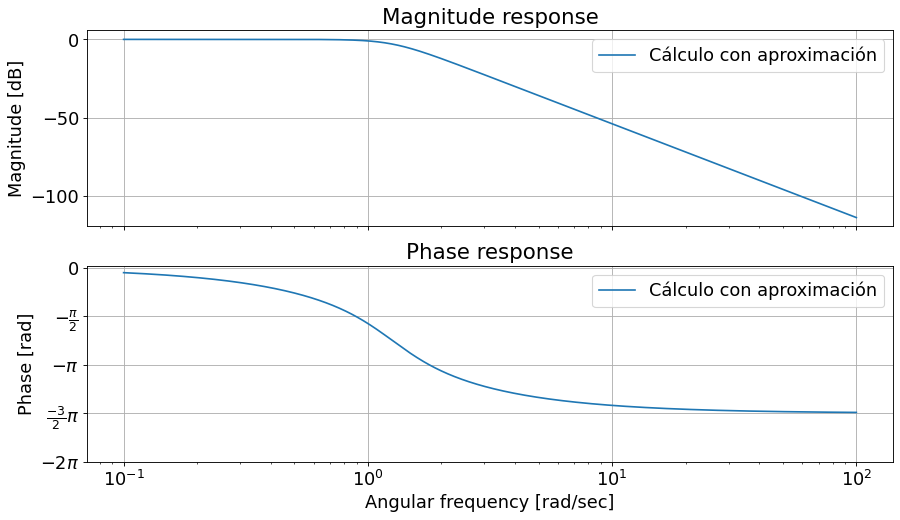

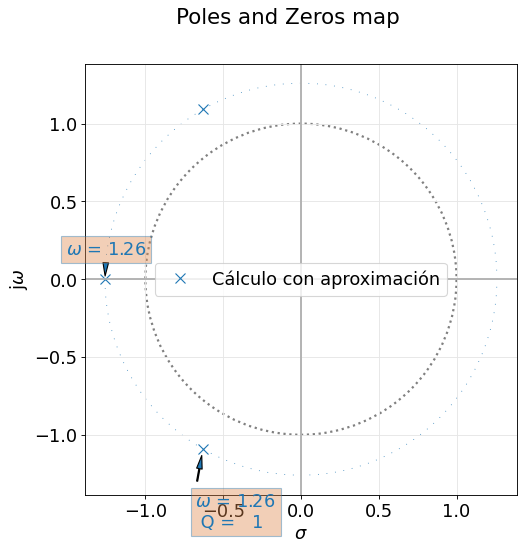

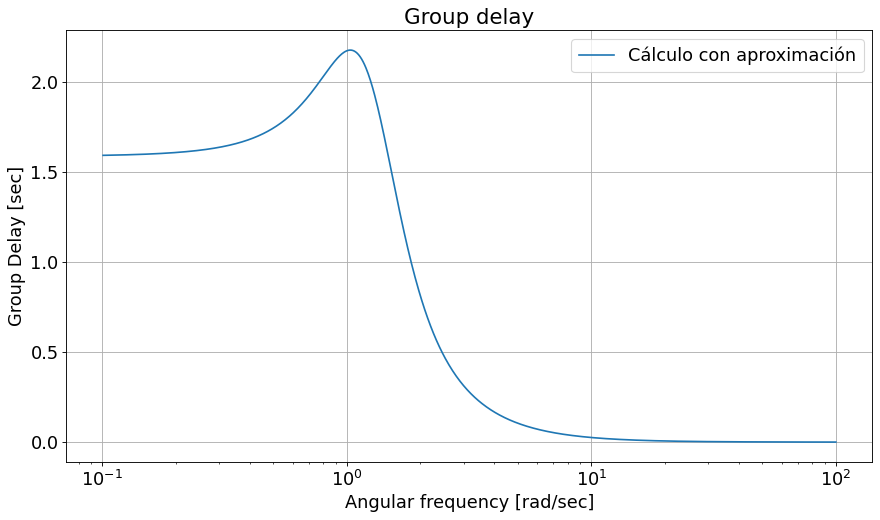

In [21]:
analyze_sys(Ts,["Cálculo con aproximación"])

### Cálculo sin aproximación de transferencia
\begin{equation} |T(s)|²= \frac{1/\epsilon²}{1/\epsilon²-s⁶}=\frac{1}{(s³+as²+bs+c)}\frac{1}{(-s³+as²-bs+c)}=T(s)*T(-s) \end{equation}

\begin{equation}T(s)= \frac{1.965226731}{𝑠3+2.50515277748371𝑠2+3.13789521926717𝑠+1.965226731}  \end{equation}

In [22]:
#Función transferencia pasabajos: |T(s)|²= T(s)*T(-s)
num2_lp = [1.965226731]
den2_lp = [1,2.5051527748371,3.13789521926717,1.965226731]

Ts = sig.TransferFunction(num2_lp,den2_lp)

In [23]:
np.roots(den2_lp)

array([-1.25257639+0.j        , -0.62628819+1.08476297j,
       -0.62628819-1.08476297j])

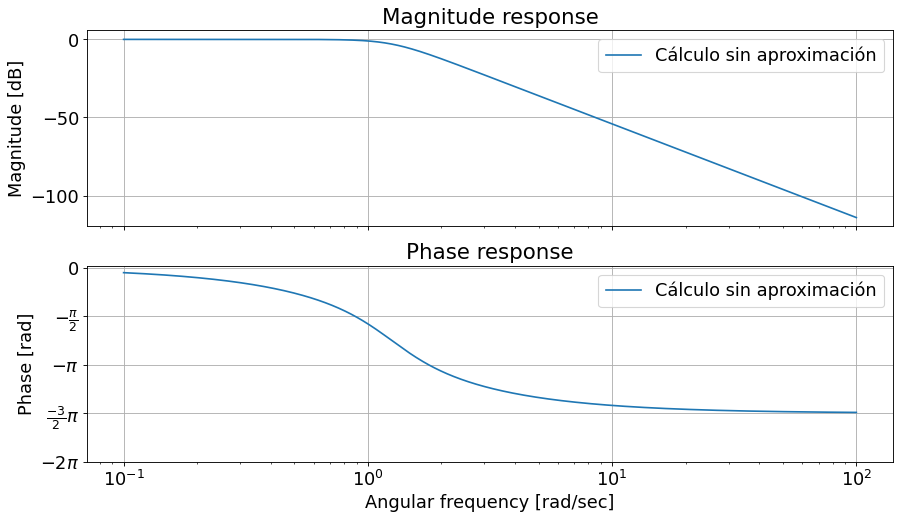

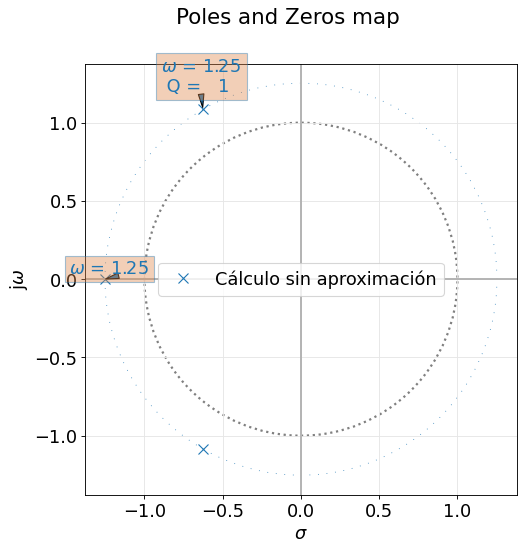

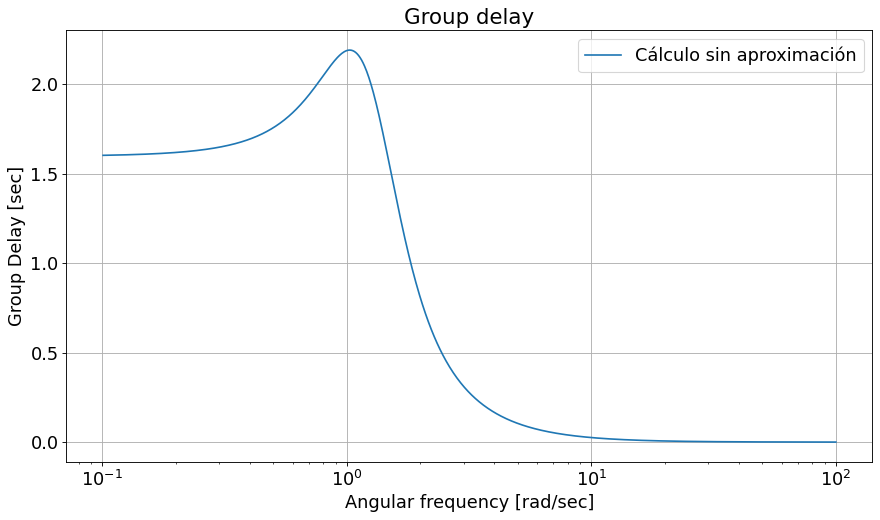

In [24]:
analyze_sys(Ts,["Cálculo sin aproximación"])

## Implementación circuital

### Implementación con componentes desnormalizados en frecuencia.


<img src="./lowpass1.png" align="center" width="2000" /> 


<img src="./Captura desde 2023-08-21 22-42-25.png" align="center" width="2000" /> 

### Implementación con capacitores de 100nf.
<img src="./Captura desde 2023-08-21 22-11-50.png" align="center" width="1200" /> 


<img src="./Captura desde 2023-08-21 22-14-43.png" align="center" width="1200" /> 

## Implementación del circuito pasivo con resistencias, capacitores y OpAmps.

La impedancia de entrada del GIC la podemos representar como:

\begin{equation} 
Z=\frac{Y_2Y_4}{Y_1Y_3Y_5}\\
Z=\frac{G_2G_4}{sC_1sC_3G_5}\\
Z=\frac{1}{s²\frac{C_1C_3G_5}{G_2G_4}}\\
\end{equation}

Llamamos D al parámetro de interés $Z=\frac{1}{s²D}$ el cual representa el valor de C que estamos buscando.

Si tomando el valor para el capacitor $C=100nf$ y tomando valores convenientes para $C_1$ y $C_3$ y adoptando un valor de $G_5=1/(2M\Omega)$

\begin{equation}
G_2=G_4=G\\
D=100.10⁹=\frac{100.10⁹10⁶G_5}{G²}\\
G=\sqrt{G_510⁶}\\
G=\frac{\sqrt{2}}{2}
\end{equation}

In [25]:
import numpy as np
G5 = 1/(2*10**6)
G  = np.sqrt(G5*10**6)
G

0.7071067811865476

<img src="./Captura desde 2023-08-21 22-24-58.png" align="center" width="2000" /> 

<img src="./Captura desde 2023-08-21 22-25-50.png" align="center" width="2000" /> 

## Planteo alternativo usando $\omega_B$

Para el desarrollo de la renormalización de $\omega_B$:

\begin{equation}
|T_n(j\omega)|²=\frac{1}{1+\epsilon^{1/n}(\omega/\omega_p)}=\frac{1}{1+[\omega/\epsilon^{-1/n}\omega_p]}\\
|T_n(j\omega)|²=\frac{1}{1+\omega/\omega_b}\\
\omega_b=\epsilon^{-1/n}\omega_p
\end{equation}

A continuación calculamos los parámetros nuevamante $\epsilon,\ n\ y\ \omega_b$:

In [26]:
Wp = 1
Ws = 2
Wb = 0
alpha_max = 1
alpha_min = 12

In [27]:
eps = np.sqrt(10**(alpha_max/10)-1)
eps

0.5088471399095875

In [28]:
n   = (np.log((10**(alpha_min/10)-1)/eps**2))/(2*np.log(Ws))
n_r = np.round(n)
n_r

3.0

In [29]:
Wb= eps**(-1/n_r)*Wp
Wb

1.2525763881810263

Entonces transferencia del módulo cuadrado nos queda:

\begin{equation}
|T_n(j\omega)|²=\frac{1}{1+(\frac{\omega}{1.2525763881810263})}
\end{equation}

Y una función transferencia de orden 3 de Butterworth:

\begin{equation}
T(s)=\frac{1}{(s+1)(s+1/2\pm0.8660254)} = \frac{1}{(s+1)(s²+s+1)}
\end{equation}

In [30]:
# Definimos los parámetros de la simulación para un butterwoth de orden 3
Wp=1
Ws=2
alpha_max=1
alpha_min=12

In [31]:
eps = np.sqrt(10**(alpha_max/10)-1)
eps

0.5088471399095875

In [32]:
n= (np.log((10**(alpha_min/10)-1)/eps**2))/(2*np.log(Ws))
n_r=np.round(n)
n_r

3.0

In [33]:
#Cargamos la funcion transferencia como vectores de sus coeficientes.

#Función transferencia pasabajos máxima planicidad de orden 3. 
z,p,k = sig.buttap(n_r)
num_lp, den_lp = sig.zpk2tf(z,p,k)
num_lp_d, den_lp_d = sig.lp2lp(num_lp,den_lp, Wb) 

H1=sig.TransferFunction(num_lp_d,den_lp_d)

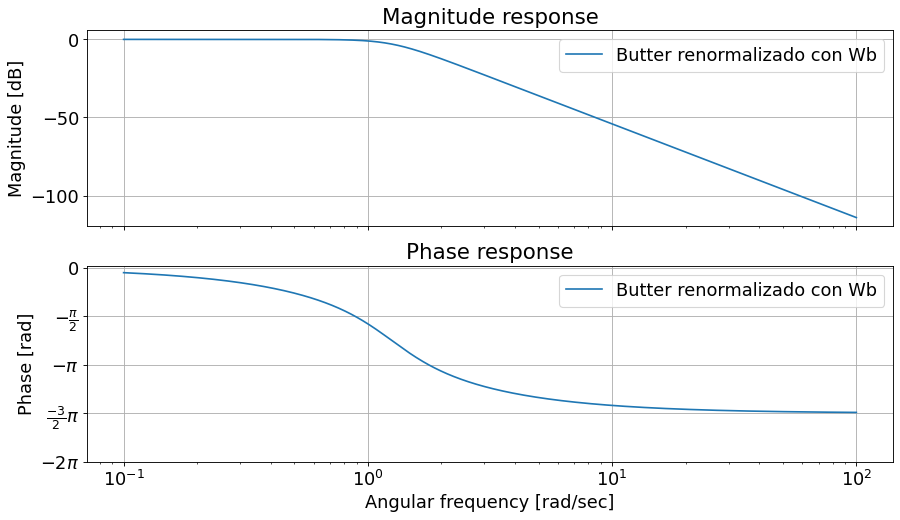

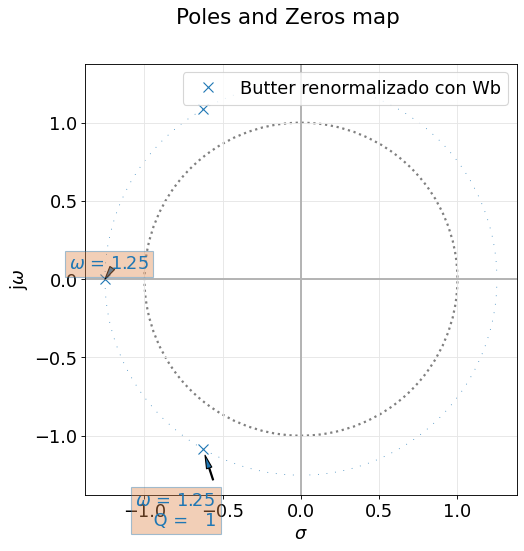

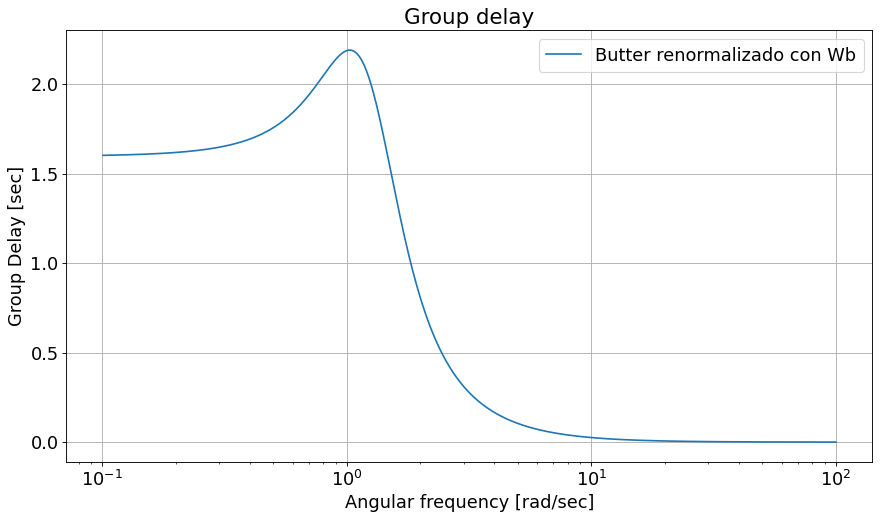

In [34]:
analyze_sys(H1,['Butter renormalizado con Wb'])